# ==================== NOTE: ====================

## Some aspects of this notbook have been disabled via comments during testing, select commented text and hit [cntrl + ?] to enable

### ======================================================================

# WeatherPy

In [121]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import requests
# https://docs.python.org/3/library/time.html
import time
import numpy as np
import json
import random
import math

from scipy.stats import linregress
import os

# API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Input File (CSV)
input_data_file = "resources/cities.csv"


# you are here
os.getcwd()

'C:\\Users\\Alec\\Documents\\Programming Resources\\Boot Camp\\06_API\\06_API_Homework\\WeatherPy'

# Generate Cities List

In [2]:
# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# # turn list results into tuples for later use
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

604

# Perform API Calls



In [3]:
# Perform a weather check on each city using a series of successive API calls.

# set up URL structure
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [4]:
# # https://realpython.com/python-rounding/
# def round_up(n, decimals=0):
#     multiplier = 10 ** decimals
#     return math.ceil(n * multiplier) / multiplier

# city_length = len(cities)

# # this function acts as a progress meter
# set_length = round_up(city_length / 50)

# # # test .get to see if all is well
# # first_city = cities[0]
# # response = requests.get(query_url + first_city).json()
# # print(json.dumps(response, indent=4, sort_keys=True))


# # make a list to store returned values 6.2_04
# city_data = []

# # set value counters outside of loop to start off correctly
# # humans start at 1 
# city_count = 1
# item_set = 1

# #sample_cities = random.sample(cities, 10)

# print('-------------------- Starting Search --------------------')

# # https://realpython.com/python-enumerate/
# for i, city in enumerate(cities):
    
#     # the homework used record sets of 50, lets do that as well.
#     # if the index value in the list leaves a 0 remainder after div. by 50 AND index value is >=50
#     # then
#     # increase the item_set by 1 and restart the item_count at 0
#     # this effictively relabels the "sublists" we are creating using enumerate
#     if (i % 50 == 0 and i>=50):
#         item_set += 1
#         city_count = 0
    
#     # else: print the search start banner and begin the loops using the enumerated cities
    
#     # setting the new url using basic concatenation allows for new values per loop without tracking
#     # counts per city
#     city_search_url = query_url + city
    
    
#     # Include a print log of each city as it's being processed (with the city number and city name).
#     print(f"Searching for City {city_count} of Item Set {item_set} of {set_length} | {city}")
   
    
#     # add 1 to the city_count to keep the loop rolling
#     city_count += 1
    
#     # start API calls, remember the try: except:
#     try:

#         #print("the try loop was successful")
#         weather_data = requests.get(city_search_url).json()
        
#         # collect all of the data ( see test sample for index/key values and table)
#         city_name = weather_data['name']
#         city_lat = weather_data['coord']['lat']
#         city_lng = weather_data['coord']['lon']
#         city_max_temp = weather_data['main']['temp_max']
#         city_humidity = weather_data['main']['humidity']
#         city_couds = weather_data['clouds']['all']
#         city_wind_spd = weather_data['wind']['speed']
#         city_country = weather_data['sys']['country']
#         city_date = weather_data['dt']
        
#         # add data to list as it collects
#         # list.append ({dictionary with values calling the weather data pull per loop cycle})
#         city_data.append({
#             "City": city_name,
#             "Latitude":city_lat,
#             "Longitude":city_lng,
#             "Max Temp":city_max_temp,
#             "Humidity":city_humidity,
#             "Cloudiness":city_couds,
#             "Wind Speed":city_wind_spd,
#             "Country":city_country,
#             "Date":city_date,})
        
    
#     except:
            
#             print("City Info Not Found, Moving on...")
#             pass
# print("------------------- Data Grab Complete -------------------")

-------------------- Starting Search --------------------
Searching for City 1 of Item Set 1 of 13.0 | mahebourg
Searching for City 2 of Item Set 1 of 13.0 | punta arenas
Searching for City 3 of Item Set 1 of 13.0 | rikitea
Searching for City 4 of Item Set 1 of 13.0 | cape town
Searching for City 5 of Item Set 1 of 13.0 | bluff
Searching for City 6 of Item Set 1 of 13.0 | utiroa
City Info Not Found, Moving on...
Searching for City 7 of Item Set 1 of 13.0 | louisbourg
City Info Not Found, Moving on...
Searching for City 8 of Item Set 1 of 13.0 | hobart
Searching for City 9 of Item Set 1 of 13.0 | illoqqortoormiut
City Info Not Found, Moving on...
Searching for City 10 of Item Set 1 of 13.0 | ilulissat
Searching for City 11 of Item Set 1 of 13.0 | talant
Searching for City 12 of Item Set 1 of 13.0 | campbell river
Searching for City 13 of Item Set 1 of 13.0 | ushuaia
Searching for City 14 of Item Set 1 of 13.0 | busselton
Searching for City 15 of Item Set 1 of 13.0 | buraydah
Searching f

Searching for City 40 of Item Set 3 of 13.0 | channel-port aux basques
Searching for City 41 of Item Set 3 of 13.0 | haines junction
Searching for City 42 of Item Set 3 of 13.0 | nome
Searching for City 43 of Item Set 3 of 13.0 | sawtell
Searching for City 44 of Item Set 3 of 13.0 | bengkulu
Searching for City 45 of Item Set 3 of 13.0 | kintampo
Searching for City 46 of Item Set 3 of 13.0 | port hueneme
Searching for City 47 of Item Set 3 of 13.0 | sorvag
City Info Not Found, Moving on...
Searching for City 48 of Item Set 3 of 13.0 | carmen
Searching for City 49 of Item Set 3 of 13.0 | chagda
City Info Not Found, Moving on...
Searching for City 0 of Item Set 4 of 13.0 | alugan
Searching for City 1 of Item Set 4 of 13.0 | beyneu
Searching for City 2 of Item Set 4 of 13.0 | hithadhoo
Searching for City 3 of Item Set 4 of 13.0 | tyrma
Searching for City 4 of Item Set 4 of 13.0 | taoudenni
Searching for City 5 of Item Set 4 of 13.0 | antofagasta
Searching for City 6 of Item Set 4 of 13.0 |

Searching for City 29 of Item Set 6 of 13.0 | salalah
Searching for City 30 of Item Set 6 of 13.0 | cassilandia
Searching for City 31 of Item Set 6 of 13.0 | roald
Searching for City 32 of Item Set 6 of 13.0 | sistranda
Searching for City 33 of Item Set 6 of 13.0 | namatanai
Searching for City 34 of Item Set 6 of 13.0 | shimoda
Searching for City 35 of Item Set 6 of 13.0 | kristiansund
Searching for City 36 of Item Set 6 of 13.0 | atar
Searching for City 37 of Item Set 6 of 13.0 | hirara
Searching for City 38 of Item Set 6 of 13.0 | muros
Searching for City 39 of Item Set 6 of 13.0 | iqaluit
Searching for City 40 of Item Set 6 of 13.0 | kachiry
Searching for City 41 of Item Set 6 of 13.0 | bauchi
Searching for City 42 of Item Set 6 of 13.0 | akhisar
Searching for City 43 of Item Set 6 of 13.0 | pingyin
Searching for City 44 of Item Set 6 of 13.0 | sao jose da coroa grande
Searching for City 45 of Item Set 6 of 13.0 | khandbari
Searching for City 46 of Item Set 6 of 13.0 | eureka
Search

Searching for City 22 of Item Set 9 of 13.0 | hlotse
Searching for City 23 of Item Set 9 of 13.0 | usinsk
Searching for City 24 of Item Set 9 of 13.0 | aldan
Searching for City 25 of Item Set 9 of 13.0 | gigmoto
Searching for City 26 of Item Set 9 of 13.0 | zhezkazgan
Searching for City 27 of Item Set 9 of 13.0 | aklavik
Searching for City 28 of Item Set 9 of 13.0 | los llanos de aridane
Searching for City 29 of Item Set 9 of 13.0 | batemans bay
Searching for City 30 of Item Set 9 of 13.0 | bhainsa
Searching for City 31 of Item Set 9 of 13.0 | behat
Searching for City 32 of Item Set 9 of 13.0 | narsaq
Searching for City 33 of Item Set 9 of 13.0 | tomatlan
Searching for City 34 of Item Set 9 of 13.0 | dawei
Searching for City 35 of Item Set 9 of 13.0 | miragoane
Searching for City 36 of Item Set 9 of 13.0 | champua
Searching for City 37 of Item Set 9 of 13.0 | alamogordo
Searching for City 38 of Item Set 9 of 13.0 | senanga
Searching for City 39 of Item Set 9 of 13.0 | la ciotat
Searchi

Searching for City 15 of Item Set 12 of 13.0 | atambua
Searching for City 16 of Item Set 12 of 13.0 | america dourada
Searching for City 17 of Item Set 12 of 13.0 | pangai
Searching for City 18 of Item Set 12 of 13.0 | chicama
Searching for City 19 of Item Set 12 of 13.0 | manggar
Searching for City 20 of Item Set 12 of 13.0 | nushki
Searching for City 21 of Item Set 12 of 13.0 | cabinda
Searching for City 22 of Item Set 12 of 13.0 | hofn
Searching for City 23 of Item Set 12 of 13.0 | charlottesville
Searching for City 24 of Item Set 12 of 13.0 | eskhar
Searching for City 25 of Item Set 12 of 13.0 | agua blanca
Searching for City 26 of Item Set 12 of 13.0 | taldan
Searching for City 27 of Item Set 12 of 13.0 | bogorodskoye
Searching for City 28 of Item Set 12 of 13.0 | sibu
Searching for City 29 of Item Set 12 of 13.0 | jabiru
City Info Not Found, Moving on...
Searching for City 30 of Item Set 12 of 13.0 | orange
Searching for City 31 of Item Set 12 of 13.0 | kahului
Searching for City

# Convert Data Grab to Data Frame then Export

In [120]:
# USE THIS TO CHANGE DATA GRAB TO DATA FRAME

# city_data_df = pd.DataFrame(city_data)
# city_data_df.to_csv(output_data_file, index=False)

# USE THIS TO UPLOAD DATAFRAME VIA CSV
city_data_df = pd.read_csv(input_data_file)

city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.4081,57.7000,74.25,73,68,13.31,MU,1634594791
1,Punta Arenas,-53.1500,-70.9167,50.11,53,40,29.93,CL,1634594791
2,Rikitea,-23.1203,-134.9692,75.47,72,22,20.80,PF,1634594525
3,Cape Town,-33.9258,18.4232,60.12,58,0,3.00,ZA,1634594570
4,Bluff,-46.6000,168.3333,49.21,48,99,24.90,NZ,1634594791


### Inspect the data and remove the cities where the humidity > 100%.


In [12]:
city_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.662291,17.460027,60.704291,71.321818,59.681818,7.907509,1.634595e+09
std,32.918798,92.485838,20.054452,20.465620,39.145921,5.913950,1.039537e+02
min,-54.800000,-179.166700,-16.460000,11.000000,0.000000,0.000000,1.634594e+09
25%,-7.766650,-64.804375,48.052500,61.000000,19.250000,3.530000,1.634595e+09
50%,22.912100,20.053500,65.095000,76.000000,75.000000,6.500000,1.634595e+09
75%,46.427050,102.205400,76.852500,87.000000,99.000000,10.400000,1.634595e+09
max,78.218600,179.316700,92.950000,100.000000,100.000000,40.130000,1.634595e+09


In [119]:
# lets check who has the most humidity
# city_data_df['Humidity'].sort_values(ascending = False).head(15)

In [14]:
# secondaty method of checking
less_humid_city_data_df = city_data_df.loc[city_data_df['Humidity'] > 100]
less_humid_city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
# This is to follow the Homework .ipynb
less_humid_city_data_df = city_data_df[(city_data_df["Humidity"] > 100)].index

In [16]:
clean_city_data = city_data_df.drop(less_humid_city_data_df, inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.4081,57.7000,74.25,73,68,13.31,MU,1634594791
1,Punta Arenas,-53.1500,-70.9167,50.11,53,40,29.93,CL,1634594791
2,Rikitea,-23.1203,-134.9692,75.47,72,22,20.80,PF,1634594525
3,Cape Town,-33.9258,18.4232,60.12,58,0,3.00,ZA,1634594570
4,Bluff,-46.6000,168.3333,49.21,48,99,24.90,NZ,1634594791


# Plotting the Data

In [17]:
# extract the data from DF
lat = clean_city_data['Latitude']
max_temp = clean_city_data['Max Temp']
cloudiness = clean_city_data['Cloudiness']
humidity = clean_city_data['Humidity']
wind_spd = clean_city_data['Wind Speed']
date = time.strftime("%x")


In [18]:
# Since we're using the same function over and over, let's define it
def scatter_plot(x, y, ylabel):
    ymin = ((y.min())-2)
    ymax = ((y.max())+2)

    Cities = plt.scatter(x,y, zorder=1,
                edgecolor='k', linewidths=0.75,
                alpha=0.9, label='Cities' )
    plt.ylabel(ylabel)
    plt.xlabel('Latitude')
    plt.title(f'City Latitude vs {ylabel} {date}')

    plt.ylim([ymin,ymax])
    #plt.rcParams['axes.axisbelow'] = True
    Equator = plt.vlines(x=0, ymin=ymin, ymax=ymax, 
                         color='r', zorder=2, alpha=0.8,
                         label='Equator' )
    plt.legend(handles=[Cities, Equator],loc="best")

    plt.grid()

    # save the figure
    plt.savefig(f"output_data/Latitude vs. {ylabel}.png")

    plt.show()

###  Latitude vs. Temperature Plot

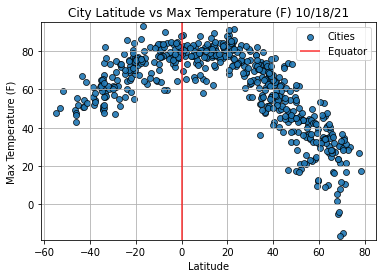

In [32]:
scatter_plot(lat, max_temp, 'Max Temperature (F)')

### Latitude vs. Humidity Plot

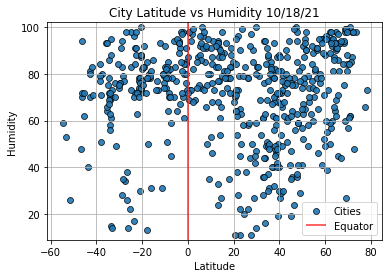

In [20]:
scatter_plot(lat, humidity, 'Humidity')

### Latitude vs. Cloudiness Plot

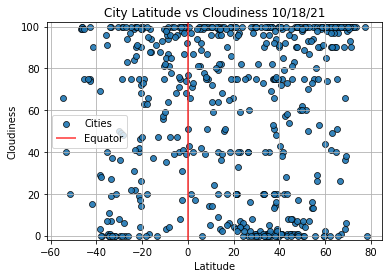

In [21]:
scatter_plot(lat, cloudiness, 'Cloudiness')

### Latitude vs. Wind Speed Plot

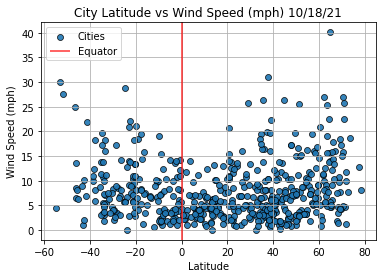

In [26]:
scatter_plot(lat, wind_spd, 'Wind Speed (mph)')

### Linear Regression

In [23]:
# separate the hemispheres via conditional using .loc()
north_hemisphere = clean_city_data.loc[(clean_city_data['Latitude'] >= 0)]
south_hemisphere = clean_city_data.loc[(clean_city_data['Latitude'] < 0)]
                                      

In [109]:
# just as before, but with changes to aspects of the function that we dont want to include in the new graphs
def scatter_plot_linregress(x, y, ylabel, hemi):
    #lineregress
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_y = slope*x+intercept
   
    # y min and max
    ymin = ((y.min())-10)
    ymax = ((y.max())+10)
    
    # scatter plot
    Cities = plt.scatter(x,y, zorder=1,
                edgecolor='k', linewidths=0.75,
                alpha=0.9, label='Cities' )
    plt.ylabel(ylabel)
    plt.xlabel('Latitude')
    plt.title(f'{hemi}ern Hemisphere - Latitude vs {ylabel} {date}')

    plt.ylim([ymin,ymax])
    #plt.rcParams['axes.axisbelow'] = True
    # https://stackoverflow.com/questions/48370562/how-to-add-regression-line-and-regression-line-equation-on-graph
    plt.plot(x, regression_y, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.legend(fontsize=9, loc="best")

    plt.grid()
    
    print(f"The r-value is {rvalue**2}")
    # save the figure
    plt.savefig(f"output_data/{hemi}ern Hemisphere - Latitude vs. {ylabel}.png")

    plt.show()

 # ===== Northern Hemisphere =====

### Max Temp vs. Latitude Linear Regression

The r-value is 0.7434876847583686


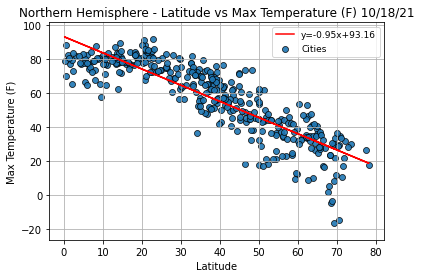

In [110]:
x = north_hemisphere['Latitude']
y = north_hemisphere['Max Temp']
scatter_plot_linregress(x, y, 'Max Temperature (F)', 'North')

##### A high R-Value of (0.743) indicates a strong positive linear corellation between the Latitude and the Max Temperature

### Humidity (%) vs. Latitude

The r-value is 0.0018914235806452406


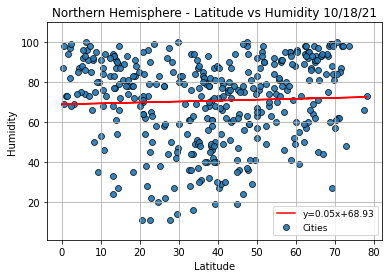

In [111]:
x = north_hemisphere['Latitude']
y = north_hemisphere['Humidity']
scatter_plot_linregress(x, y, 'Humidity', 'North')

##### An R-Value this close to zero (~0.0018) means there is almost no correlation between the X & Y variables or the wrong model was chosen to represent this data

### Cloudiness (%) vs. Latitude

The r-value is 0.012508827902784111


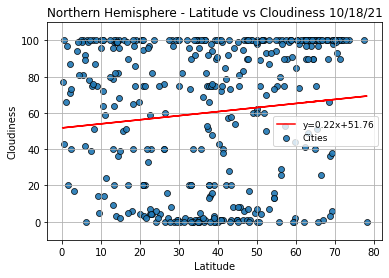

In [112]:
x = north_hemisphere['Latitude']
y = north_hemisphere['Cloudiness']
scatter_plot_linregress(x, y, 'Cloudiness', 'North')

##### An R-Value of (0.125) means there is almost no correlation between the X & Y variables or the wrong model was chosen to represent this data

### Wind Speed (mph) vs. Latitude

The r-value is 0.09181177870930826


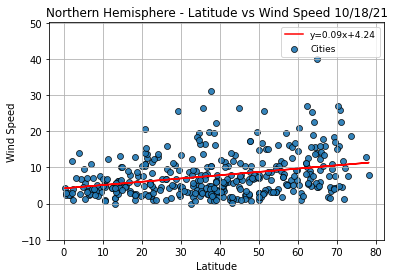

In [113]:
x = north_hemisphere['Latitude']
y = north_hemisphere['Wind Speed']
scatter_plot_linregress(x, y, 'Wind Speed', 'North')

###### An R-value of (0.092) menas there is practically no correlation between the Wind Speed and the Latitude. Citing the appearance of a slight positive correlation would not be beneficial as only ~9% of the data would support this claim. 

 # ===== Southern Hemisphere =====

### Max Temp vs. Latitude Linear Regression

The r-value is 0.568226432398009


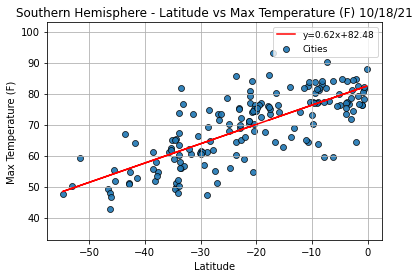

In [114]:
x = south_hemisphere['Latitude']
y = south_hemisphere['Max Temp']
scatter_plot_linregress(x, y, 'Max Temperature (F)', 'South')

###### An R-value of (0.568) indicates a moderate to strong, positive correlation between the two variables as seen above; as the values increase there is an observable trend between increase in Temperature as the Latitude approaches the Equator.

### Humidity (%) vs. Latitude

The r-value is 0.06481220572430982


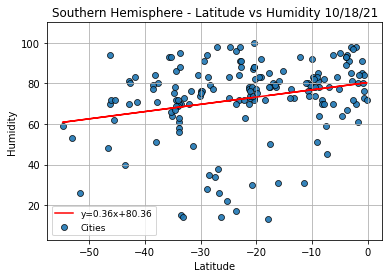

In [115]:
x = south_hemisphere['Latitude']
y = south_hemisphere['Humidity']
scatter_plot_linregress(x, y, 'Humidity', 'South')

#####  The R-value indicates an almost nonexistent positve trend as the variable increase/decrease. The correlation is not worth noting too heavily and can produce unrealistic conclusions.

### Cloudiness (%) vs. Latitude

The r-value is 0.07672219198216895


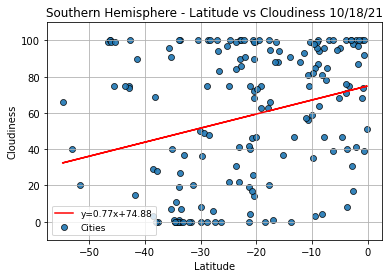

In [117]:
x = south_hemisphere['Latitude']
y = south_hemisphere['Cloudiness']
scatter_plot_linregress(x, y, 'Cloudiness', 'South')

#####  This R-value shows very little correlation between the Dependant variable cloudiness and the change in latitude.

### Wind Speed (mph) vs. Latitude

The r-value is 0.06757404740117323


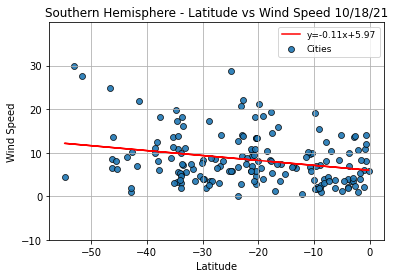

In [118]:
x = south_hemisphere['Latitude']
y = south_hemisphere['Wind Speed']
scatter_plot_linregress(x, y, 'Wind Speed', 'South')

##### An R-Value this close to zero indicates no true correlation between the change in wind speed as one approaches the Equator.